In [1]:
import asyncio
import threading
import scripts
import json
import time
import os
import cv2
import numpy as np
from matplotlib import pyplot as plt
import sklearn.cluster
import skimage
from skimage import morphology



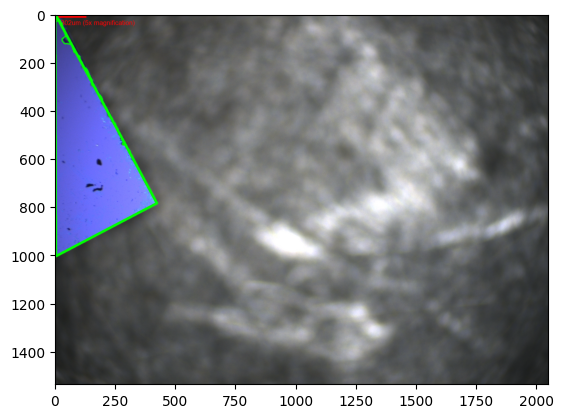

In [10]:
# Convert to YCrCb Channel and extract cb channel
img = cv2.imread('testFile.png', cv2.IMREAD_COLOR)
imgYCrCb = cv2.cvtColor(img, cv2.COLOR_BGR2YCR_CB)
channel = imgYCrCb[:,:,2]

ret, threshold = cv2.threshold(channel, 160,  255, cv2.THRESH_BINARY)


result = img.copy()
contours, hierarchy = cv2.findContours(threshold, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
# contours = contours[0] if len(contours) == 2 else contours[1]
resImg = cv2.drawContours(result, contours, -1, (0, 255, 0), 3) 

for cont in contours:
    maxX = cont[0][0]
    maxY = cont[0][0]
    minX = cont[0][0]
    minY = cont[0][0]
    for point in cont:
        pt = point[0]
        if pt[0] > maxX[0]:
            maxX = pt
        elif pt[0] == maxX[0]:
            maxX = [pt[0], max(pt[1], maxX[1])]

        if pt[0] < minX[0]:
            minX = pt
        elif pt[0] == minX[0]:
            minX = [pt[0], min(pt[1], minX[1])]

        if pt[1] > maxY[1]:
            maxY = pt
        elif pt[1] == maxY[1]:
            maxY = [max(pt[0], maxY[0]), pt[1]]

        if pt[1] < minY[1]:
            minY = pt
        elif pt[1] == minY[1]:
            minY = [min(pt[0], maxY[0]), pt[1]]
    cv2.line(result, minX, minY, [0,255,0], 10)
    cv2.line(result, minY, maxX, [0,255,0], 10)
    cv2.line(result, maxX, maxY, [0,255,0], 10)
    cv2.line(result, maxY, minX, [0,255,0], 10)
    # print(f"{minX}, {minY}, {maxX}, {maxY}")

plt.imshow(cv2.cvtColor(resImg, cv2.COLOR_BGR2RGB))
# cv2.imwrite('testFileOut.png', cv2.cvtColor(channel, cv2.COLOR_BGR2RGB))

In [ ]:
# Convert to YCrCb Channel and extract cb channel
imgYCrCb = cv2.cvtColor(img, cv2.COLOR_BGR2YCR_CB)
channel = imgYCrCb[:,:,2]


# Run K Means Clustering wiht 2 clusters (color qunatization of k=2)
image = channel
(h, w) = image.shape[:2]
image = image.reshape((image.shape[0] * image.shape[1], 1))
clt = sklearn.cluster.MiniBatchKMeans(n_clusters = 2) # <- k color value
labels = clt.fit_predict(image)
quant = clt.cluster_centers_.astype("uint8")[labels]
quant = quant.reshape((h, w, 1))

# Since we only have two things in our color space, 
# I want to remove all connected components smaller than k=150
# out = skimage.morphology.area_opening(quant, area_threshold=150, connectivity=2)


edged = cv2.Canny(quant, 100, 200) 
contours, hierarchy = cv2.findContours(edged, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE) 
# img2 = cv2.drawContours(cv2.cvtColor(quant, cv2.COLOR_BGR2RGB), contours, -1, (0, 255, 0), 3) 

# plt.imshow(cv2.cvtColor(img2, cv2.COLOR_BGR2RGB))
cv2.imwrite('testFileOut.png', cv2.cvtColor(quant, cv2.COLOR_BGR2RGB))

True

Number of Contours found = 77


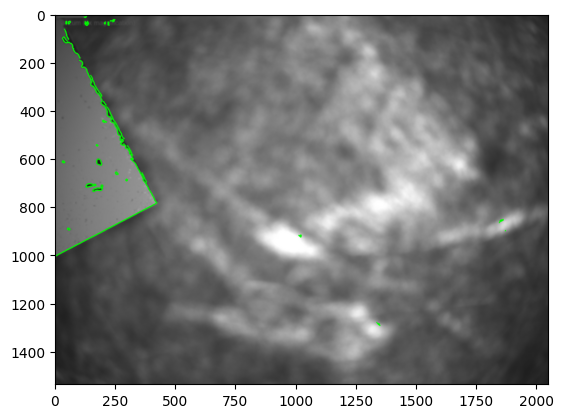

In [ ]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) 
# Find Canny edges 
denoised = cv2.fastNlMeansDenoising(gray, None, 50, 7 ,7) 
edged = cv2.Canny(denoised, 10, 50) 
edged = cv2.medianBlur(edged, 1)

# edged = cv2.fastNlMeansDenoising(edged2, None, 100, 7 ,7) 


# Finding Contours 
# Use a copy of the image e.g. edged.copy() 
# since findContours alters the image 
contours, hierarchy = cv2.findContours(edged, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE) 
  
# cv2.imshow('Canny Edges After Contouring', img) 
# cv2.waitKey(0) 
  
print("Number of Contours found = " + str(len(contours))) 
  
# Draw all contours 
# -1 signifies drawing all contours 
# img.fill(0)
img2 = cv2.drawContours(cv2.cvtColor(denoised, cv2.COLOR_BGR2RGB), contours, -1, (0, 255, 0), 3) 

writeoutImage = img2
plt.imshow(cv2.cvtColor(writeoutImage, cv2.COLOR_BGR2RGB))

In [ ]:
# blurred = cv2.GaussianBlur(src=img, ksize=(3, 5), sigmaX=0.5) 
# edges = cv2.Canny(blurred, 70, 135) 



# lower = np.uint8([0, 200, 0])
# upper = np.uint8([255, 255, 255])
# white_mask = cv2.inRange(edges, lower, upper)
# # yellow color mask
# lower = np.uint8([10, 0,   100])
# upper = np.uint8([40, 255, 255])
# yellow_mask = cv2.inRange(image, lower, upper)
# # combine the mask
# mask = cv2.bitwise_or(white_mask, yellow_mask)
# result = img.copy()